# Regression Project

## File IO

Only File IO...

You may not change this code.

In [1]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

tk_window = tkinter.Tk()
cwd = os.getcwd()

tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))

tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))

tr_ans = tr_ans.iloc[:, 0]

ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

tk_window.destroy()




## Predict Algorithm

Type your source code (Champion Algorithm)

In [2]:
import numpy as np

#Delete String columns
string_columns = tr_data.dtypes
string_boolidx = string_columns == np.object

tr_data_num = tr_data.drop(tr_data.columns[string_boolidx], axis=1)
ts_data_num = ts_data.drop(ts_data.columns[string_boolidx], axis=1)


#delete NaN columns
tr_nan_idx = tr_data_num.isna().any()
ts_nan_idx = ts_data_num.isna().any()

total_nan_idx = np.logical_or(tr_nan_idx, ts_nan_idx)

tr_data_pre = tr_data_num.drop(tr_data_num.columns[total_nan_idx], axis=1)
ts_data_pre = ts_data_num.drop(ts_data_num.columns[total_nan_idx], axis=1)


In [2]:
from scipy import stats
from scipy.stats import skew,norm

#shape
print('Shape all_data: {}'.format(tr_data_pre.shape))

tr_data_pre['TotalSF'] = tr_data_pre['TotalBsmtSF'] + tr_data_pre['1stFlrSF'] + tr_data_pre['2ndFlrSF']
ts_data_pre['TotalSF'] = ts_data_pre['TotalBsmtSF'] + ts_data_pre['1stFlrSF'] + ts_data_pre['2ndFlrSF']


numeric_features = tr_data_pre.dtypes[tr_data_pre.dtypes != "object"].index

skewed_features = tr_data_pre[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(7)


skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    tr_data_pre[feat] = boxcox1p(tr_data_pre[feat], lam)
    ts_data_pre[feat] = boxcox1p(ts_data_pre[feat], lam)
    
tr_data_pre = pd.get_dummies(tr_data_pre)
ts_data_pre = pd.get_dummies(ts_data_pre)





NameError: name 'tr_data_pre' is not defined

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

rg = GradientBoostingRegressor(random_state=42, n_estimators=140)
rg.fit(tr_data_pre, tr_ans)

y_pred = rg.predict(ts_data_pre)


pred_df = pd.DataFrame(y_pred)

pred_df.to_csv("output.csv", mode='w')

In [29]:
from sklearn.ensemble import ExtraTreesRegressor

ER = ExtraTreesRegressor(n_estimators=130)
ER = ER.fit(tr_data_pre, tr_ans)

y_pred = ER.predict(ts_data_pre)
pred_df = pd.DataFrame(y_pred)

pred_df.to_csv("output.csv", mode='w')



In [3]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(learning_rate=0.012100000000000003, n_estimators=994,
                                  max_depth=4,
                                   random_state=42, criterion= 'mse')
#max_features='sqrt'  min_samples_leaf=15,min_samples_split=10,
GBoost.fit(tr_data_pre, tr_ans)

y_pred=GBoost.predict(ts_data_pre)
pred_df = pd.DataFrame(y_pred)

pred_df.to_csv("output.csv", mode='w')


## Check Accuracy

Only for check accuracy

In [4]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

tk_window = tkinter.Tk()
cwd = os.getcwd()
ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
ts_ans = ts_ans.iloc[:, 0]
tk_window.destroy()

print(rmse(ts_ans, y_pred))

20601.195541934147


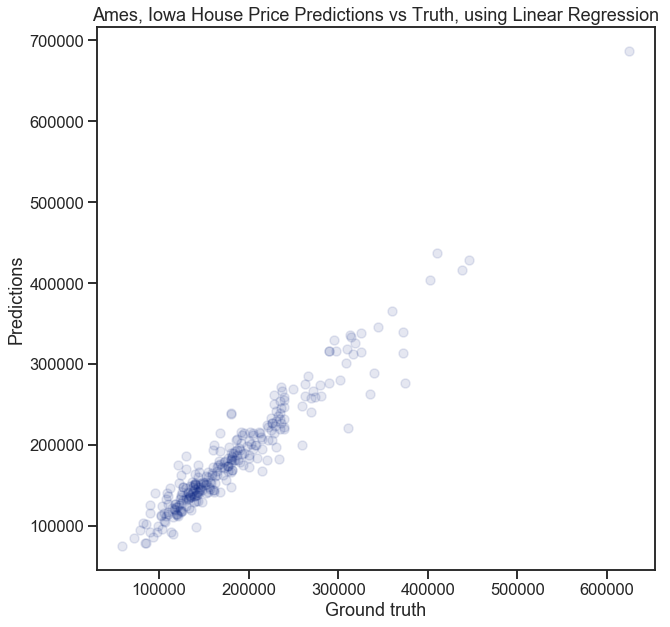

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(ts_ans, y_pred, alpha=.1)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

In [ ]:
k_range = list(range(1,10, 1))
scores = []
for k in k_range:
    #knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train, y_train)
    #y_pred = knn.predict(X_test)
    GBoost = GradientBoostingRegressor(learning_rate=0.012100000000000003, n_estimators=994,
                                 max_depth=k,
                                   random_state=42, criterion= 'mse')
#max_features='sqrt'  min_samples_leaf=15,min_samples_split=10,
    GBoost.fit(tr_data_pre, tr_ans)
    y_pred=GBoost.predict(ts_data_pre)
    pred_df = pd.DataFrame(y_pred)
    scores.append(rmse(ts_ans, y_pred))
    print(rmse(ts_ans, y_pred),k)
    
#1003
plt.plot(k_range, scores)
plt.xlabel('Value of k for model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of model')
plt.show()

28270.714367564768 1
23665.09424293333 2
22036.134946469923 3
20601.195541934147 4
22400.95070331278 5
22327.82001660314 6
